In [16]:
import numpy as np
import pandas as pd
import tensorflow

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('Churn_Modelling.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
X = df.iloc[:, 3:13]
y = df.iloc[:, -1]

In [23]:
X = pd.get_dummies(X, drop_first=True)

In [26]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 8371 to 7270
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6700 non-null   int64  
 1   Age                6700 non-null   int64  
 2   Tenure             6700 non-null   int64  
 3   Balance            6700 non-null   float64
 4   NumOfProducts      6700 non-null   int64  
 5   HasCrCard          6700 non-null   int64  
 6   IsActiveMember     6700 non-null   int64  
 7   EstimatedSalary    6700 non-null   float64
 8   Geography_Germany  6700 non-null   uint8  
 9   Geography_Spain    6700 non-null   uint8  
 10  Gender_Male        6700 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 490.7 KB


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
model = Sequential()

model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))

model.add(Dense(50, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.3))

model.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(12, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [32]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stop], validation_batch_size=128, epochs=150)

Epoch 1/150
53/53 [==============================] - 7s 18ms/step - loss: 0.5257 - accuracy: 0.7899 - val_loss: 0.4778 - val_accuracy: 0.8052
Epoch 2/150
53/53 [==============================] - 1s 12ms/step - loss: 0.5077 - accuracy: 0.7910 - val_loss: 0.4523 - val_accuracy: 0.8052
Epoch 3/150
53/53 [==============================] - 1s 11ms/step - loss: 0.4899 - accuracy: 0.7916 - val_loss: 0.4303 - val_accuracy: 0.8052
Epoch 4/150
53/53 [==============================] - 1s 11ms/step - loss: 0.4691 - accuracy: 0.7918 - val_loss: 0.4204 - val_accuracy: 0.8052
Epoch 5/150
53/53 [==============================] - 1s 12ms/step - loss: 0.4630 - accuracy: 0.7915 - val_loss: 0.4170 - val_accuracy: 0.8052
Epoch 6/150
53/53 [==============================] - 1s 12ms/step - loss: 0.4534 - accuracy: 0.7924 - val_loss: 0.4121 - val_accuracy: 0.8052
Epoch 7/150
53/53 [==============================] - 1s 12ms/step - loss: 0.4520 - accuracy: 0.7948 - val_loss: 0.4092 - val_accuracy: 0.8052
Epoch 

In [35]:
loss_df = pd.DataFrame(model.history.history)

In [36]:
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.525721,0.789851,0.477807,0.805152
1,0.507675,0.791045,0.452347,0.805152
2,0.489925,0.791642,0.430277,0.805152
3,0.469133,0.791791,0.420377,0.805152
4,0.463008,0.791493,0.416963,0.805152
...,...,...,...,...
61,0.373743,0.843731,0.339221,0.866970
62,0.370233,0.846269,0.339193,0.868485
63,0.377814,0.840746,0.339062,0.866364
64,0.372676,0.847761,0.338569,0.866667


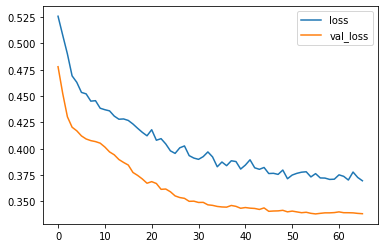

In [38]:
loss_df[['loss', 'val_loss']].plot()

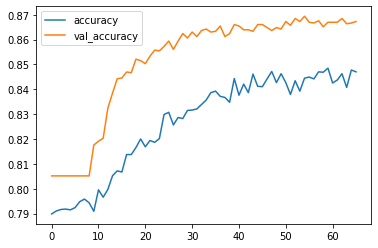

In [39]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [40]:
model.evaluate(X_test, y_test)

104/104 [==============================] - 1s 5ms/step - loss: 0.3383 - accuracy: 0.8673


[0.3382687568664551, 0.8672727346420288]

In [49]:
y_pred = model.predict(X_test)

In [52]:
pred = np.where(y_pred >= 0.5, 1, 0)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.77      0.45      0.57       643

    accuracy                           0.87      3300
   macro avg       0.83      0.71      0.75      3300
weighted avg       0.86      0.87      0.85      3300



In [57]:
confusion_matrix(y_test, pred)

array([[2570,   87],
       [ 351,  292]])